In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from importlib import reload

import celeri
from celeri.scripts import snap_segments

plt.rcParams["text.usetex"] = (
    False  # Plotting is much much faster with tex fonts turned off
)

# Read data and call `snap_segments.py`

In [3]:
CONFIG_FILE_NAME = "../data/config/wna_config.json"

model = celeri.build_model(CONFIG_FILE_NAME)

# Arbitrary hand modification of segment geometry, so that the effect of snap_segments is more obvious
mesh_segs = np.where(model.segment.mesh_file_index == 0)[0]
model.segment.loc[mesh_segs[5], "lon1"] += 1
model.segment.loc[mesh_segs[4], "lon2"] += 1

2025-12-05 16:48:02.752 | INFO     | celeri.model:read_data:113 - Reading data files
2025-12-05 16:48:02.757 | SUCCESS  | celeri.model:read_data:126 - Read: /Users/jloveles/Documents/python/celeri/data/segment/wna_segment.csv
2025-12-05 16:48:02.759 | SUCCESS  | celeri.model:read_data:131 - Read: /Users/jloveles/Documents/python/celeri/data/block/wna_block.csv
2025-12-05 16:48:02.901 | SUCCESS  | celeri.mesh:from_params:681 - Read: /Users/jloveles/Documents/python/celeri/data/mesh/cascadia.msh
2025-12-05 16:48:02.905 | SUCCESS  | celeri.model:read_data:168 - Read: /Users/jloveles/Documents/python/celeri/data/station/wna_station.csv
2025-12-05 16:48:02.906 | INFO     | celeri.model:read_data:184 - No mogi_file_name
2025-12-05 16:48:02.907 | INFO     | celeri.model:read_data:207 - No sar_file_name
2025-12-05 16:48:03.219 | INFO     | celeri.model:assign_block_labels:596 - Closed blocks: 31, equal to block file blocks: 31
2025-12-05 16:48:03.219 | INFO     | celeri.model:assign_block_labe

# Call `snap_segments.py`

In [12]:
new_segment = snap_segments.snap_segments(model.segment, model.meshes)
# snapped_segment_file_name = model.config.segment_file_name.with_stem(model.config.segment_file_name.stem + "_snapped")
# new_segment.to_csv(snapped_segment_file_name)

# Plot comparison

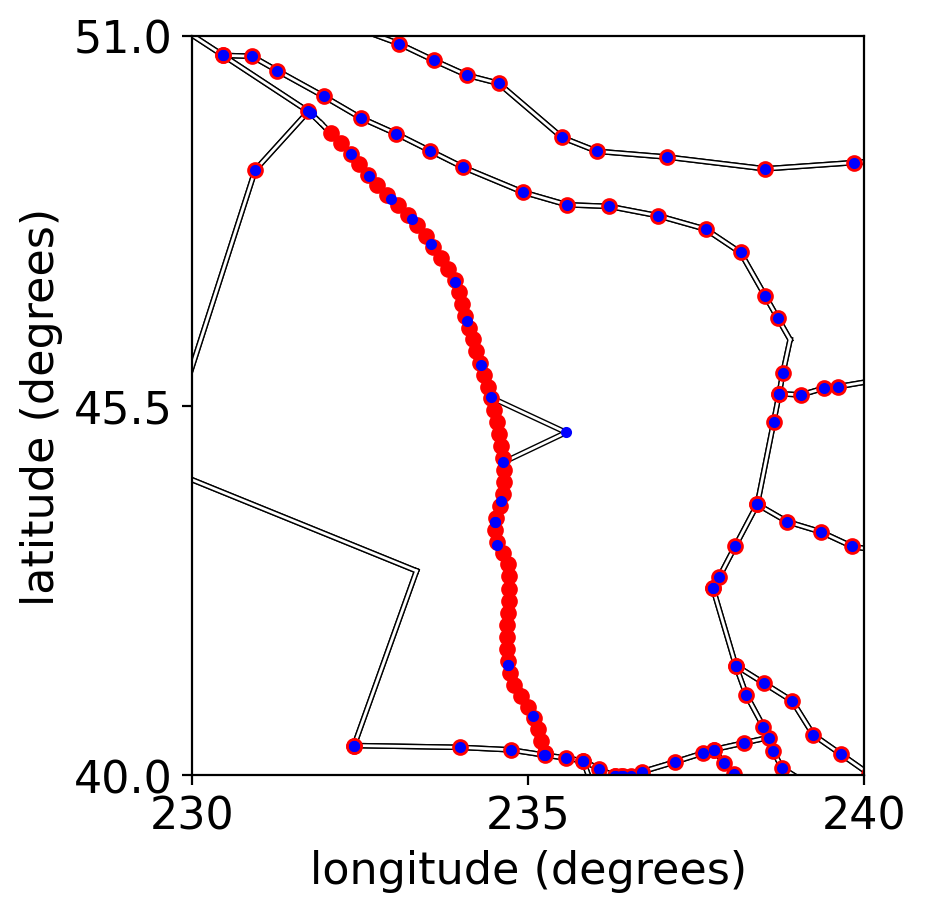

In [13]:
p = celeri.plot.PlotParams()
p.figsize_vectors = (12, 6)
p.fontsize = 16
p.lon_range = np.array([230, 240])
p.lat_range = np.array([40, 51])
p.lon_ticks = np.linspace(p.lon_range[0], p.lon_range[1], 3)
p.lat_ticks = np.linspace(p.lat_range[0], p.lat_range[1], 3)

celeri.plot.plot_common_elements(p, model.segment, p.lon_range, p.lat_range)
celeri.plot.plot_common_elements(p, new_segment, p.lon_range, p.lat_range)

plt.plot(new_segment.lon1, new_segment.lat1, '.r', markersize=10)
plt.plot(model.segment.lon1, model.segment.lat1, '.b')

plt.show()
